In [7]:
from src.modeling.cnn_vae import CNN_VAE
from src.data.df_dataset import DfDataset

import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import DataLoader
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [8]:
model = CNN_VAE.load_from_checkpoint(  
    "/Users/tobiaochsner/Documents/ETH/GeneticFitness/data/models/cnn_vae/epoch=99-val_loss=0.18.ckpt"
)

In [9]:
df = pd.read_csv("/Users/tobiaochsner/Documents/ETH/GeneticFitness/data/output/preprocessed.csv")
dataset = DfDataset(df, ["rna_loops"])
loader = DataLoader(dataset, batch_size=len(dataset))

In [10]:
all_items = next(iter(loader))
predictions = model(all_items)

In [11]:
mu = predictions[2]
mu = mu.detach().numpy()

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

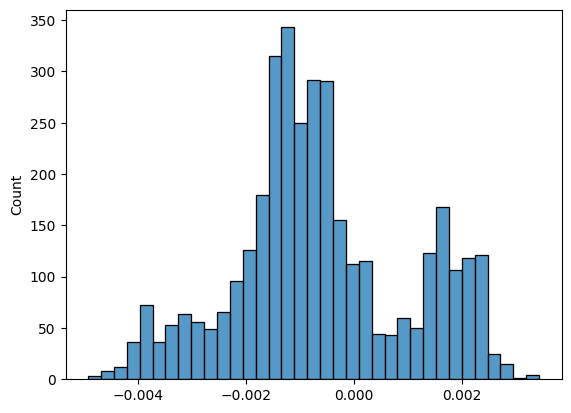

In [12]:
sns.histplot(mu.flatten())

In [21]:
sns.scatterplot(x=mu[:, 0], y=mu[:, 1], hue=df.sequence_dna)

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498:

KeyboardInterrupt: 

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

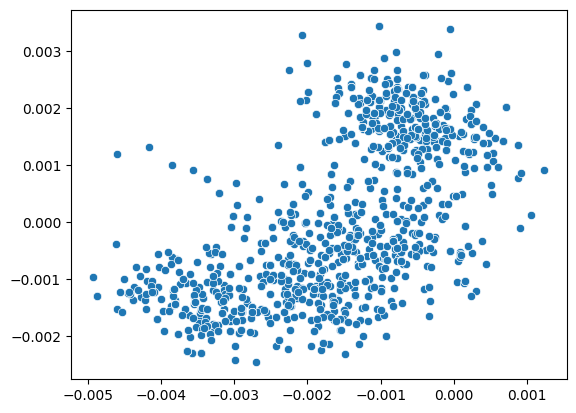

In [15]:
sns.scatterplot(x=mu[:, 0], y=mu[:, 1])

In [14]:
len(set(df.rna_loops))

780